<a href="https://colab.research.google.com/github/PranavShashidhara/ML-Models-Using-Pytorch/blob/main/Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train = x_scaler.fit_transform(x_train)
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
x_test = x_scaler.transform(x_test)
y_test = y_scaler.transform(y_test.reshape(-1, 1))

In [2]:
#Converting to tensors for pytorch
x_train_t = torch.tensor(x_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
x_test_t = torch.tensor(x_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

class LinearRegression(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.Linear = nn.Linear(in_features=input_dim, out_features=1)
  def forward(self, x):
    return self.Linear(x)
model = LinearRegression(input_dim=1)
optim = torch.optim.SGD(params=model.parameters(), lr = 0.01)
epochs = 500

losses = []
l = nn.MSELoss()
for epoch in range(epochs):
  model.train()
  optim.zero_grad()

  y_pred = model(x_train_t)
  loss = l(y_pred, y_train_t)
  loss.backward()
  optim.step()
  losses.append(loss)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 0.7191045880317688
Epoch: 10 | Loss: 0.5689011216163635
Epoch: 20 | Loss: 0.468624085187912
Epoch: 30 | Loss: 0.40167832374572754
Epoch: 40 | Loss: 0.3569847047328949
Epoch: 50 | Loss: 0.3271469473838806
Epoch: 60 | Loss: 0.3072270452976227
Epoch: 70 | Loss: 0.293928325176239
Epoch: 80 | Loss: 0.28505003452301025
Epoch: 90 | Loss: 0.2791227698326111
Epoch: 100 | Loss: 0.27516570687294006
Epoch: 110 | Loss: 0.2725239396095276
Epoch: 120 | Loss: 0.27076026797294617
Epoch: 130 | Loss: 0.2695828378200531
Epoch: 140 | Loss: 0.26879674196243286
Epoch: 150 | Loss: 0.2682719826698303
Epoch: 160 | Loss: 0.2679216265678406
Epoch: 170 | Loss: 0.26768770813941956
Epoch: 180 | Loss: 0.2675316035747528
Epoch: 190 | Loss: 0.26742732524871826
Epoch: 200 | Loss: 0.267357736825943
Epoch: 210 | Loss: 0.2673112750053406
Epoch: 220 | Loss: 0.267280250787735
Epoch: 230 | Loss: 0.26725953817367554
Epoch: 240 | Loss: 0.26724570989608765
Epoch: 250 | Loss: 0.26723650097846985
Epoch: 260 | Loss

<ipython-input-3-ac5867062ef5>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.plot(x_test_t, torch.tensor(y_pred_test, dtype=torch.float32), color='red', label='Predicted')


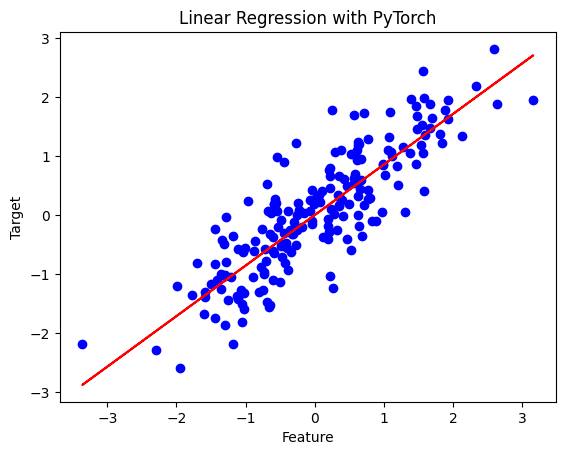

In [3]:
model.eval()
with torch.no_grad():
  y_pred_test = model(x_test_t)

plt.scatter(x_test_t, y_test, color='blue', label='Actual')
plt.plot(x_test_t, torch.tensor(y_pred_test, dtype=torch.float32), color='red', label='Predicted')
plt.title("Linear Regression with PyTorch")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

MSE: 0.30166443296504986


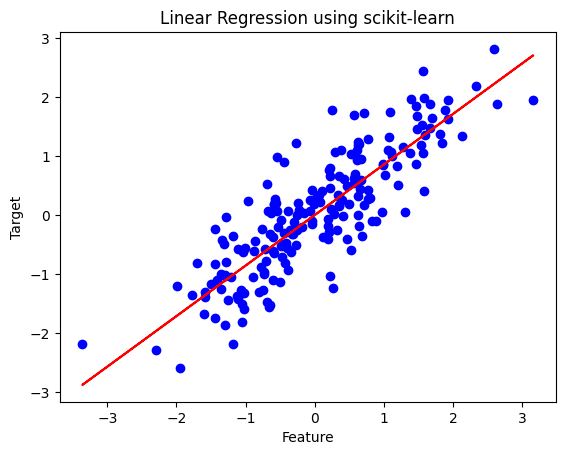

In [4]:
#Doing Linear Regression with Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
loss_scikit = mean_squared_error(y_test, y_pred)
print("MSE:", loss_scikit)
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', label='Predicted')
plt.title("Linear Regression using scikit-learn")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()